# Diabetes Prediction Using CART algorithm

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd # for data manipulation
import numpy as np # for data manipulation
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn import tree # for decision tree models
from sklearn.metrics import confusion_matrix

import plotly.express as px  # for data visualization
import plotly.graph_objects as go # for data visualization
import graphviz # for plotting decision tree graphs

**IMPORTING DATA AND DATA MAINPULATION**

In [ ]:
# Set Pandas options to display more columns
pd.options.display.max_columns=50

# Read in the diabetes data csv
df=pd.read_csv('diabetes.csv', encoding='utf-8')

# Drop records where target RainTomorrow=NaN
df=df[pd.isnull(df['Outcome'])==False]

# For other columns with missing values, fill them in with column mean
df=df.fillna(df.mean())


# Show a snaphsot of data
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


DATA VISUALIZATION

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe2045f9050>,
      dtype=object)

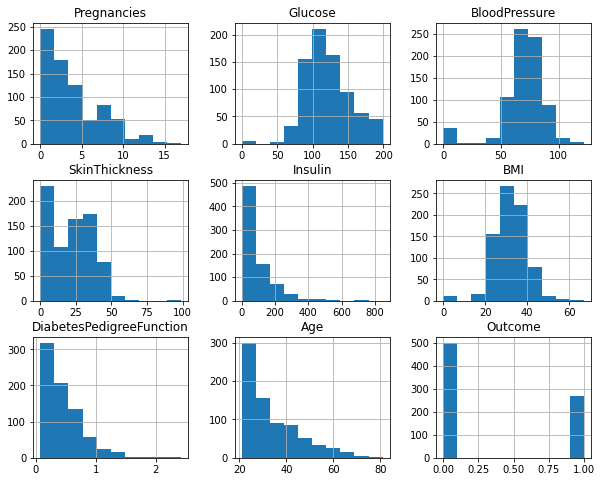

In [ ]:
filt_df = df[0:8]
df.hist(figsize=(10,8))

# CART MODEL



**FITTING, DATA SPLITTING**

In [ ]:
#DATA SPLITTING
train, test = train_test_split(df, test_size = 0.4, random_state=30)
y_train = train["Outcome"]
X_train = train[train.columns[0:8]]
X_test  = test[test.columns[0:8]]
y_test  = test["Outcome"]
feat_names = train.columns[0:8]
target_classes = ['0','1'] 

#MODEL FITTING
model = tree.DecisionTreeClassifier(max_depth=4, random_state=0)
clf= model.fit(X_train,y_train)

EVALUATING THE MODEL

--------------------------------------------------------
*************** Evaluation on Train Data ***************
Accuracy Score:  0.7934782608695652
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       294
           1       0.71      0.72      0.71       166

    accuracy                           0.79       460
   macro avg       0.78      0.78      0.78       460
weighted avg       0.79      0.79      0.79       460

--------------------------------------------------------
*************** Evaluation on Test Data ***************
Accuracy Score:  0.7597402597402597
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       206
           1       0.63      0.66      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308

-----------------------------------------------

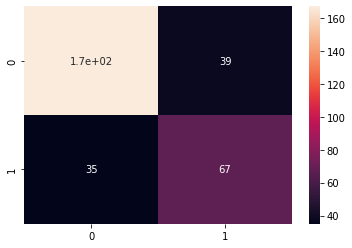

In [ ]:
# Predict class labels on train and test data
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

# Evaluation on Train Data
print('--------------------------------------------------------')
print('*************** Evaluation on Train Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
print(classification_report(y_train, pred_labels_tr))

#Evaluation on Test Data
print('--------------------------------------------------------')
print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

 # Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_in_)
print('--------------------------------------------------------')
print("")
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True, 
                                #rotate=True,
                               ) 
graph = graphviz.Source(dot_data)
graph
graph.render('Decision_Tree_all_vars_gini')

 #Confusion matrix
conf = confusion_matrix(y_test, pred_labels_te)
print(conf)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)




# CART MODEL WITH MORE DEPTH 


**FITTING THE MODEL, DATA SPLITTING**

In [ ]:
#DATA SPLITTING
train, test = train_test_split(df, test_size = 0.4, random_state=30)
y_train = train["Outcome"]
X_train = train[train.columns[0:8]]
X_test  = test[test.columns[0:8]]
y_test  = test["Outcome"]
feat_names = train.columns[0:8]
target_classes = ['0','1'] 

#MODEL FITTING
model = tree.DecisionTreeClassifier(max_depth=7, random_state=0)
clf= model.fit(X_train,y_train)

**MODEL EVALUATION**

--------------------------------------------------------
*************** Evaluation on Train Data ***************
Accuracy Score:  0.9152173913043479
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       294
           1       0.88      0.88      0.88       166

    accuracy                           0.92       460
   macro avg       0.91      0.91      0.91       460
weighted avg       0.92      0.92      0.92       460

--------------------------------------------------------
*************** Evaluation on Test Data ***************
Accuracy Score:  0.762987012987013
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       206
           1       0.64      0.64      0.64       102

    accuracy                           0.76       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.76      0.76      0.76       308

------------------------------------------------

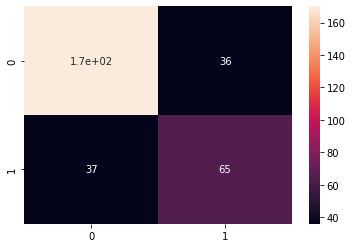

In [ ]:
# Predict class labels on train and test data
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

# Evaluation on Train Data
print('--------------------------------------------------------')
print('*************** Evaluation on Train Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
print(classification_report(y_train, pred_labels_tr))

#Evaluation on Test Data
print('--------------------------------------------------------')
print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")
 # Tree summary and model evaluation metrics
print('*************** Tree Summary ***************')
print('Classes: ', clf.classes_)
print('Tree Depth: ', clf.tree_.max_depth)
print('No. of leaves: ', clf.tree_.n_leaves)
print('No. of features: ', clf.n_features_in_)
print('--------------------------------------------------------')
print("")
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns, 
                                class_names=[str(list(clf.classes_)[0]), str(list(clf.classes_)[1])],
                                filled=True, 
                                rounded=True, 
                                #rotate=True,
                               ) 
graph = graphviz.Source(dot_data)
graph
graph.render('Decision_Tree_With_More_Depth')

 #Confusion matrix
conf = confusion_matrix(y_test, pred_labels_te)
print(conf)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)


**FEATURE IMPORTANCE BAR GRAPH**

DecisionTree Feature ranking:
1. feature Glucose (0.329440)
2. feature BMI (0.228562)
3. feature Age (0.150306)
4. feature DiabetesPedigreeFunction (0.108997)
5. feature BloodPressure (0.105434)
6. feature Pregnancies (0.039040)
7. feature Insulin (0.026845)
8. feature SkinThickness (0.011376)


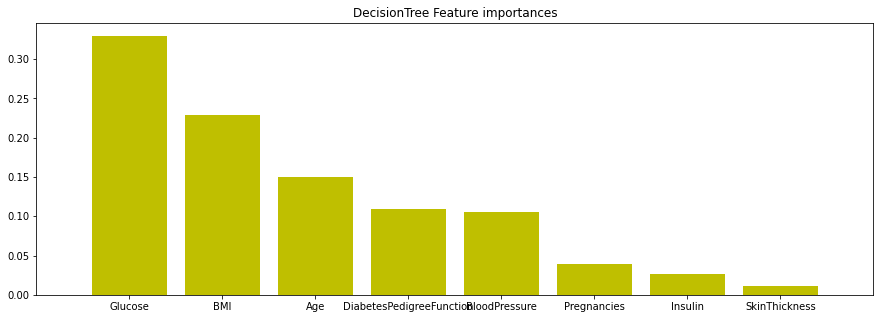

In [ ]:
#Feature Importance DecisionTreeClassifier
importance = model.feature_importances_
indices = np.argsort(importance)[::-1]
print("DecisionTree Feature ranking:")
for f in range(X_train.shape[1]):
  print("%d. feature %s (%f)" % (f + 1, feat_names[indices[f]], importance[indices[f]]))
plt.figure(figsize=(15,5))
plt.title("DecisionTree Feature importances")
plt.bar(range(X_train.shape[1]), importance[indices], color="y", align="center")
plt.xticks(range(X_train.shape[1]), feat_names[indices])
plt.xlim([-1, X_train.shape[1]])
plt.show()

# CART MODEL WITH TWO FEATURES

**FITTING THE MODEL, DATA SPLITTING**

In [ ]:
#DATA SPLITTING
train, test = train_test_split(df, test_size = 0.4, random_state=30)
y_train = train["Outcome"]
X_train = train[train.columns[1:6:4]]
X_test  = test[test.columns[1:6:4]]
y_test  = test["Outcome"]
feat_names = train.columns[1:6:4]
target_classes = ['0','1'] 

#MODEL FITTING
model = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
clf= model.fit(X_train,y_train)

**MODEL EVALUATION**

--------------------------------------------------------
*************** Evaluation on Train Data ***************
Accuracy Score:  0.7630434782608696
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       294
           1       0.70      0.61      0.65       166

    accuracy                           0.76       460
   macro avg       0.75      0.73      0.74       460
weighted avg       0.76      0.76      0.76       460

--------------------------------------------------------
*************** Evaluation on Test Data ***************
Accuracy Score:  0.7824675324675324
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       206
           1       0.68      0.66      0.67       102

    accuracy                           0.78       308
   macro avg       0.75      0.75      0.75       308
weighted avg       0.78      0.78      0.78       308

-----------------------------------------------

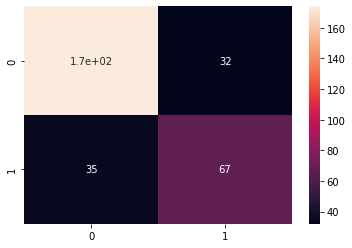

In [ ]:
# Predict class labels on train and test data
pred_labels_tr = model.predict(X_train)
pred_labels_te = model.predict(X_test)

# Evaluation on Train Data
print('--------------------------------------------------------')
print('*************** Evaluation on Train Data ***************')
score_tr = model.score(X_train, y_train)
print('Accuracy Score: ', score_tr)
print(classification_report(y_train, pred_labels_tr))

#Evaluation on Test Data
print('--------------------------------------------------------')
print('*************** Evaluation on Test Data ***************')
score_te = model.score(X_test, y_test)
print('Accuracy Score: ', score_te)
print(classification_report(y_test, pred_labels_te))
print('--------------------------------------------------------')
print("")

 #Confusion matrix
conf = confusion_matrix(y_test, pred_labels_te)
print(conf)
label = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=label, yticklabels=label)




In [ ]:
def Plot_3D(X, X_test, y_test, clf, x1, x2, mesh_size, margin):
            
    # Specify a size of the mesh to be used
    mesh_size=mesh_size
    margin=margin

    # Create a mesh grid on which we will run our model
    x_min, x_max = X.iloc[:, 0].fillna(X.mean()).min() - margin, X.iloc[:, 0].fillna(X.mean()).max() + margin
    y_min, y_max = X.iloc[:, 1].fillna(X.mean()).min() - margin, X.iloc[:, 1].fillna(X.mean()).max() + margin
    xrange = np.arange(x_min, x_max, mesh_size)
    yrange = np.arange(y_min, y_max, mesh_size)
    xx, yy = np.meshgrid(xrange, yrange)
            
    # Calculate predictions on grid
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
    Z = Z.reshape(xx.shape)

    # Create a 3D scatter plot with predictions
    fig = px.scatter_3d(x=X_test[x1], y=X_test[x2], z=y_test,
                     opacity=0.8, color_discrete_sequence=['black'])

    # Set figure title and colors
    fig.update_layout(#title_text="Scatter 3D Plot with CART Prediction Surface",
                      paper_bgcolor = 'white',
                      scene = dict(xaxis=dict(title=x1,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'),
                                   yaxis=dict(title=x2,
                                              backgroundcolor='white',
                                              color='black',
                                              gridcolor='#f0f0f0'
                                              ),
                                   zaxis=dict(title='Probability of Diabetes',
                                              backgroundcolor='lightgrey',
                                              color='black', 
                                              gridcolor='#f0f0f0', 
                                              )))
    
    # Update marker size
    fig.update_traces(marker=dict(size=1))

    # Add prediction plane
    fig.add_traces(go.Surface(x=xrange, y=yrange, z=Z, name='CART Prediction',
                              colorscale='Jet',
                              reversescale=True,
                              showscale=False, 
                              contours = {"z": {"show": True, "start": 0.5, "end": 0.9, "size": 0.5}}))
    fig.show()
    return fig
fig = Plot_3D(X_train, X_test, y_test, clf, x1='Glucose', x2='BMI', mesh_size=1, margin=1)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names

